<a href="https://colab.research.google.com/github/memoandrea/Sinandah/blob/main/movie_sentiment_analysis_with_LSTM_using_keras_and_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATA RETRIEVAL

#libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import imdb
import pandas as pd

# Limit the number of words to consider (optional)
top_words = 5000

# Load the data as lists of sequences
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)




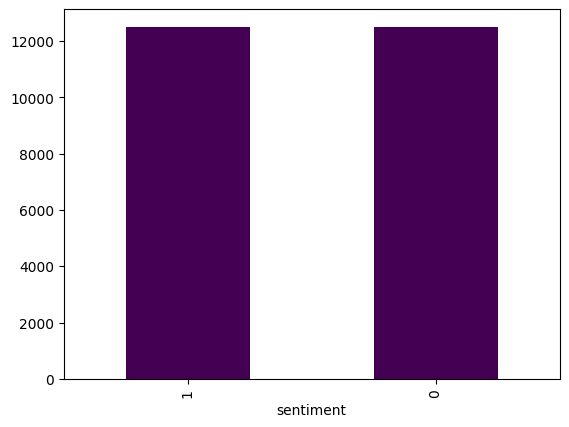

In [3]:
# Create a dataframe with separate columns for reviews and labels
# The original code was passing the strings 'review' and 'sentiment' as the data
# instead of column names. This has been corrected below.
mcommentDF = pd.DataFrame({'review': X_train, 'sentiment': y_train})

axplot = mcommentDF.sentiment.value_counts().plot(kind='bar', colormap = 'viridis')

plt.show()

In [4]:
mcommentDF.head()

,review,sentiment
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 43...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 2...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0


In [5]:
#extract review text and review label for each dataset row
#load them into python lists
!python -m spacy download en_core_web_md  # Download the required model

import spacy
nlp = spacy.load('en_core_web_md')  # Load the model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
#create movie comment sample  and categories objects

movie_comment_exp = []
categories = []

In [10]:
#perform tokenization

for idx, rw in mcommentDF.iterrows():
  comment_str = rw['review'] # Access the review
  # Ensure comment_str is a string
  if not isinstance(comment_str, str):
    comment_str = ' '.join(map(str, comment_str))

  rating = rw['sentiment']
  categories.append(rating)

  mtoks = [token.text for token in nlp(comment_str)] # Pass the string to nlp
  movie_comment_exp.append(mtoks)

movie_comment_exp[0]


['1',
 '14',
 '22',
 '16',
 '43',
 '530',
 '973',
 '1622',
 '1385',
 '65',
 '458',
 '4468',
 '66',
 '3941',
 '4',
 '173',
 '36',
 '256',
 '5',
 '25',
 '100',
 '43',
 '838',
 '112',
 '50',
 '670',
 '2',
 '9',
 '35',
 '480',
 '284',
 '5',
 '150',
 '4',
 '172',
 '112',
 '167',
 '2',
 '336',
 '385',
 '39',
 '4',
 '172',
 '4536',
 '1111',
 '17',
 '546',
 '38',
 '13',
 '447',
 '4',
 '192',
 '50',
 '16',
 '6',
 '147',
 '2025',
 '19',
 '14',
 '22',
 '4',
 '1920',
 '4613',
 '469',
 '4',
 '22',
 '71',
 '87',
 '12',
 '16',
 '43',
 '530',
 '38',
 '76',
 '15',
 '13',
 '1247',
 '4',
 '22',
 '17',
 '515',
 '17',
 '12',
 '16',
 '626',
 '18',
 '2',
 '5',
 '62',
 '386',
 '12',
 '8',
 '316',
 '8',
 '106',
 '5',
 '4',
 '2223',
 '2',
 '16',
 '480',
 '66',
 '3785',
 '33',
 '4',
 '130',
 '12',
 '16',
 '38',
 '619',
 '5',
 '25',
 '124',
 '51',
 '36',
 '135',
 '48',
 '25',
 '1415',
 '33',
 '6',
 '22',
 '12',
 '215',
 '28',
 '77',
 '52',
 '5',
 '14',
 '407',
 '16',
 '82',
 '2',
 '8',
 '4',
 '107',
 '117',
 '2',

In [12]:
#data and vocabulary preparation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [14]:
#feed ktoken into list and convert them into ids by calling texts_to_sequences
#create a ktoken and perfom tokenization

ktoken = Tokenizer()
ktoken.fit_on_texts(movie_comment_exp)


In [15]:
#create utterance sequences object

seq_utterance = ktoken.texts_to_sequences(movie_comment_exp)

In [16]:
#pad short utterance sequences to a max length of 50

MLEN = 50
ps_utterance = pad_sequences(seq_utterance, MLEN, padding = 'post')

In [17]:
#convert list of reviews and labels  to numpy arrays

#convert the ps_utterance into numpy arrays
ps_utterance = np.array(ps_utterance)

In [18]:
#create the category list
catlist = np.array(categories)
catlist = catlist.reshape(catlist.shape[0], 1)

In [19]:
#load tensorflow keras related modules

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras import optimizers

In [21]:
#implement the input layer
"""None means the dimension can be any scalar number"""

utterance_input  = Input(shape = (None, ))

In [22]:
#implement the embedding layer
""" index 0 is reserved for padding value"""

embedding = Embedding(input_dim = len(ktoken.word_index) + 1, output_dim = 100)(utterance_input)

In [23]:
#implement the LSTM layer
""" 256 is the dimension of the hidden state"""

LSTM_layer = LSTM(units = 256)(embedding)

In [24]:
#implement the output layer
"""256-dim vector from lstm is condensed into 1-dim vector: class labels of 0 and 1"""

outlayer = Dense(1, activation = 'sigmoid')(LSTM_layer)

In [25]:
#model compilation
#create theimdb user review lstm model

imdb_mdl = Model(inputs = utterance_input, outputs = outlayer)
imdb_mdl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         499900    
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 865725 (3.30 MB)
Trainable params: 865725 (3.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
#invoke model compilation

imdb_mdl.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
#model fitting and experiment evaluation
""" 70% train 30% test """

imdb_mdl.fit(ps_utterance, catlist, epochs = 5, batch_size = 64, validation_split = 0.3)

Epoch 1/5
274/274 [==============================] - 77s 270ms/step - loss: 0.5010 - accuracy: 0.7433 - val_loss: 0.4403 - val_accuracy: 0.7987
Epoch 2/5
274/274 [==============================] - 70s 255ms/step - loss: 0.3590 - accuracy: 0.8427 - val_loss: 0.4411 - val_accuracy: 0.7984
Epoch 3/5
274/274 [==============================] - 71s 259ms/step - loss: 0.2922 - accuracy: 0.8780 - val_loss: 0.4443 - val_accuracy: 0.7943
Epoch 4/5
274/274 [==============================] - 74s 269ms/step - loss: 0.2382 - accuracy: 0.9022 - val_loss: 0.4915 - val_accuracy: 0.7864
Epoch 5/5
274/274 [==============================] - 73s 265ms/step - loss: 0.1861 - accuracy: 0.9270 - val_loss: 0.5973 - val_accuracy: 0.7776
